In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import zipfile

base_url = "/content/gdrive/MyDrive//Rice.zip"

zip_ref = zipfile.ZipFile(base_url, 'r')
zip_ref.extractall('/content')

In [3]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
base_folder_dir = '/content/Rice/Rice_Image_Dataset'
output_folder_dir = '/content/dataset/split'
splitfolders.ratio(base_folder_dir, output=output_folder_dir, seed= 1337, ratio=(.6, .4))

Copying files: 5000 files [00:01, 2965.65 files/s]


In [6]:
train_dir = os.path.join(output_folder_dir, 'train')
val_dir = os.path.join(output_folder_dir, 'val')

In [7]:
dimension_input = (130,130)
channel = (3, )
input_shape = dimension_input + channel
batch_size = 20
epoch = 30

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.0,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=dimension_input,
                                                    batch_size=batch_size,
                                                    classes = ["Arborio", "Basmasti", "Ispala", "Jasmine", "Karacadag"],
                                                    class_mode='categorical',
                                                    subset = 'training',
                                                    shuffle=True)

val_generator = validation_datagen.flow_from_directory(val_dir,
                                                target_size=dimension_input,
                                                batch_size=batch_size,
                                                classes = ["Arborio", "Basmasti", "Ispala", "Jasmine", "Karacadag"],
                                                class_mode='categorical',
                                                shuffle=True)

Found 1800 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


In [9]:
train_arborio = os.path.join('/content/dataset/split/train/Arborio')
train_basmati = os.path.join('/content/dataset/split/train/Basmati')
train_ipsala = os.path.join('/content/dataset/split/train/Ipsala')
train_jasmine = os.path.join('/content/dataset/split/train/Jasmine')
train_karacadag = os.path.join('/content/dataset/split/train/Karacadag')

testing_arborio= os.path.join('/content/dataset/split/val/Arborio')
testing_basmati = os.path.join('/content/dataset/split/val/Basmati')
testing_ipsala = os.path.join('/content/dataset/split/val/Ipsala')
testing_jasmine = os.path.join('/content/dataset/split/val/Jasmine')
testing_karacadag = os.path.join('/content/dataset/split/val/Karacadag')

In [10]:
train_arborio_name = os.listdir(train_arborio)
train_basmati_name = os.listdir(train_basmati)
train_ipsala_name = os.listdir(train_ipsala)
train_jasmine_name = os.listdir(train_jasmine)
train_karacadag_name = os.listdir(train_karacadag)

test_arborio_name = os.listdir(testing_arborio)
test_basmati_name = os.listdir(testing_basmati)
test_ipsala_name = os.listdir(testing_ipsala)
test_jasmine_name = os.listdir(testing_jasmine)
test_karacadag_name = os.listdir(testing_karacadag)

In [11]:
print("Total File Training Beras Arborio : ", train_arborio_name)
print("Total File Training Beras Basmati : ", train_basmati_name)
print("Total File Training Beras Ipsala : ", train_ipsala_name)
print("Total File Training Beras Jasmine : ", train_jasmine_name)
print("Total File Training Beras Karacadag : ", train_karacadag_name)

print("Total File Testing Beras Arborio : ", test_arborio_name)
print("Total File Testing Beras Basmati : ", test_basmati_name)
print("Total File Testing Beras Ipsala : ", train_ipsala_name)
print("Total File Testing Beras Jasmine : ", train_jasmine_name)
print("Total File Testing Beras Karacadag : ", train_karacadag_name)

Total File Training Beras Arborio :  ['Arborio (103).jpg', 'Arborio (731).jpg', 'Arborio (569).jpg', 'Arborio (56).jpg', 'Arborio (356).jpg', 'Arborio (485).jpg', 'Arborio (581).jpg', 'Arborio (901).jpg', 'Arborio (796).jpg', 'Arborio (99).jpg', 'Arborio (916).jpg', 'Arborio (318).jpg', 'Arborio (184).jpg', 'Arborio (357).jpg', 'Arborio (513).jpg', 'Arborio (711).jpg', 'Arborio (649).jpg', 'Arborio (874).jpg', 'Arborio (804).jpg', 'Arborio (441).jpg', 'Arborio (215).jpg', 'Arborio (62).jpg', 'Arborio (32).jpg', 'Arborio (952).jpg', 'Arborio (613).jpg', 'Arborio (253).jpg', 'Arborio (384).jpg', 'Arborio (4).jpg', 'Arborio (390).jpg', 'Arborio (822).jpg', 'Arborio (786).jpg', 'Arborio (350).jpg', 'Arborio (101).jpg', 'Arborio (452).jpg', 'Arborio (53).jpg', 'Arborio (310).jpg', 'Arborio (516).jpg', 'Arborio (559).jpg', 'Arborio (289).jpg', 'Arborio (890).jpg', 'Arborio (44).jpg', 'Arborio (593).jpg', 'Arborio (221).jpg', 'Arborio (365).jpg', 'Arborio (78).jpg', 'Arborio (191).jpg', 'Arbo

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

testing_datagen = ImageDataGenerator(rescale=1./255)

training_generator = train_datagen.flow_from_directory(
    '/content/dataset/split/train',
    classes = ["Arborio", "Basmasti", "Ispala", "Jasmine", "Karacadag"],
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'categorical'
)

test_generator = testing_datagen.flow_from_directory(
    '/content/dataset/split/val',
    classes = ["Arborio", "Basmasti", "Ispala", "Jasmine", "Karacadag"],
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 1800 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


In [13]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import layers
from keras.models import Model

In [14]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [15]:
image_size = 150
input_shape = (image_size, image_size, 3)

epochs = 10
batch_size = 32

base_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in base_model.layers[:15]:
    layer.trainable = False

for layer in base_model.layers[15:]:
    layer.trainable = True
    
last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)

model = Model(base_model.input, x)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
history = model.fit(train_generator, validation_data = test_generator, epochs = epochs)

Epoch 1/10
90/90 [==============================] - 663s 7s/step - loss: 0.2328 - accuracy: 0.9117 - val_loss: 0.3332 - val_accuracy: 0.8992
Epoch 2/10
90/90 [==============================] - 661s 7s/step - loss: 0.0416 - accuracy: 0.9833 - val_loss: 0.5609 - val_accuracy: 0.8275
Epoch 3/10
90/90 [==============================] - 657s 7s/step - loss: 0.0237 - accuracy: 0.9917 - val_loss: 0.1546 - val_accuracy: 0.9525
Epoch 4/10
90/90 [==============================] - 659s 7s/step - loss: 0.0443 - accuracy: 0.9872 - val_loss: 0.3900 - val_accuracy: 0.8967
Epoch 5/10
90/90 [==============================] - 658s 7s/step - loss: 0.0447 - accuracy: 0.9889 - val_loss: 0.0990 - val_accuracy: 0.9675
Epoch 6/10
90/90 [==============================] - 660s 7s/step - loss: 0.0203 - accuracy: 0.9950 - val_loss: 0.1088 - val_accuracy: 0.9650
Epoch 7/10
90/90 [==============================] - 661s 7s/step - loss: 0.0122 - accuracy: 0.9950 - val_loss: 0.2488 - val_accuracy: 0.9400
Epoch 8/10
90

In [17]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(training_generator, epochs=25, steps_per_epoch=20, validation_data = test_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 66s 3s/step - loss: 13.2290 - accuracy: 0.3800 - val_loss: 1.1437 - val_accuracy: 0.3000
Epoch 2/25
20/20 [==============================] - 63s 3s/step - loss: 1.2456 - accuracy: 0.3250 - val_loss: 1.2786 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 63s 3s/step - loss: 1.1850 - accuracy: 0.3600 - val_loss: 1.1366 - val_accuracy: 0.3333
Epoch 4/25
20/20 [==============================] - 63s 3s/step - loss: 1.2437 - accuracy: 0.3800 - val_loss: 1.2319 - val_accuracy: 0.4333
Epoch 5/25
20/20 [==============================] - 63s 3s/step - loss: 1.1567 - accuracy: 0.3200 - val_loss: 1.1305 - val_accuracy: 0.3667
Epoch 6/25
20/20 [==============================] - 63s 3s/step - loss: 1.1656 - accuracy: 0.3650 - val_loss: 3.0187 - val_accuracy: 0.3000
Epoch 7/25
20/20 [==============================] - 63s 3s/step - loss: 1.4048 - accuracy: 0.5100 - val_loss: 6.3326 - val_accuracy: 0.4000
Epoch 8/25
20/20 [=

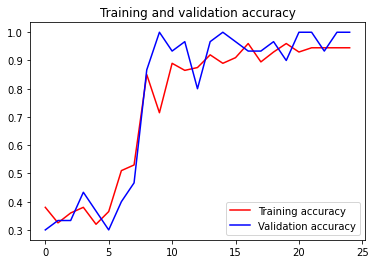

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Jasmine


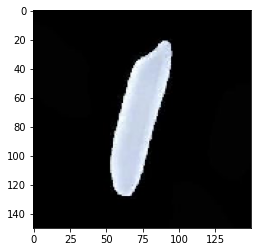

In [10]:
import numpy as np
from keras.preprocessing import image
from matplotlib import pyplot as plt

path = "../model-devolepment/Rice_Image_Dataset/Basmati/Basmati (1).jpg"
img = image.load_img(path, target_size =(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

if classes[0][0]==1:
  print('Arborio')
elif classes[0][1]==1:
  print('Basmati')
elif classes[0][2]==1:
  print('Ipsala')
elif classes[0][3]==1:
  print('Jasmine')
elif classes[0][4]==1:
  print('Karacadag')
else:
  print('Tidak Terdeteksi')